# Math 395 Miniproject 3 (Neural nets)

Hope College, Fall 2024

Import libraries

In [ ]:
import sys
!{sys.executable} -m pip install visualkeras

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import scipy.io
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
%matplotlib inline
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
import visualkeras
import tensorflow as tf


## (1) Display the dicision boundary of a neural network

Train several neural networks on the twomoons data and display their decision boundaries

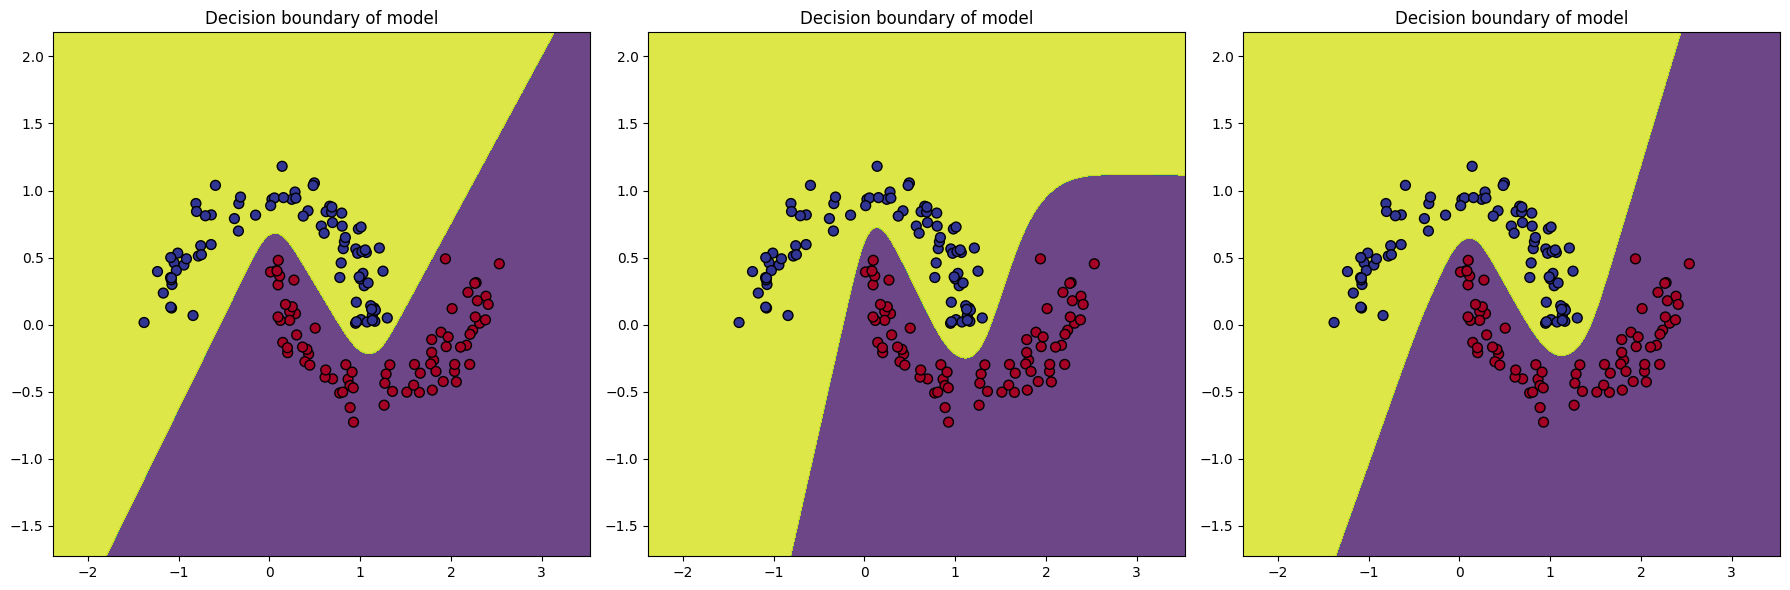

In [136]:
mat = scipy.io.loadmat('twomoons.mat')

X_train = mat['X']
y_train = mat['truelabels'].ravel()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.2)


def plot_decision_boundary(X, y, model, ax):
    h = .002  # Step size in the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.RdYlBu)
    ax.set_title(f"Decision boundary of model")

# Train several neural networks with different configurations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

hidden_layer_configs = [(3,), (4,6), (5,10)]  # Different layer configurations

for i, config in enumerate(hidden_layer_configs):
    # Create and train the MLPClassifier 
    model = MLPClassifier(hidden_layer_sizes=config,
                          activation = 'logistic',
                          solver = 'adam',
                          #penalty = 'l1',
                          alpha = 1e-4,
                          learning_rate_init=0.2,
                          max_iter=10000)
    model.fit(X_train, y_train)
    
    # Plot decision boundary for each model
    plot_decision_boundary(X_train, y_train, model, axes[i])

plt.tight_layout()
plt.show()

## (2) Fully connected neural networks

Train a neural network using the training images in the fashion mnist data set and evaluate the network on the test data. Try to play with the hyperparameters of the network, such as 

- number of layers, 
- number of neurons on each layer, 
- activation function,
- regularization parameter, and
- batch size

What is the lowest test error you can achieve?

In [ ]:
mat = scipy.io.loadmat('fashion.mat')

X_train = mat['Xtr']
y_train = mat['ytr']
X_test = mat['Xtst']
y_test = mat['ytst']

## (3) Convolutional neural network on the fashion-mnist data

You can refer to the following webpage:

https://www.datacamp.com/tutorial/convolutional-neural-networks-python

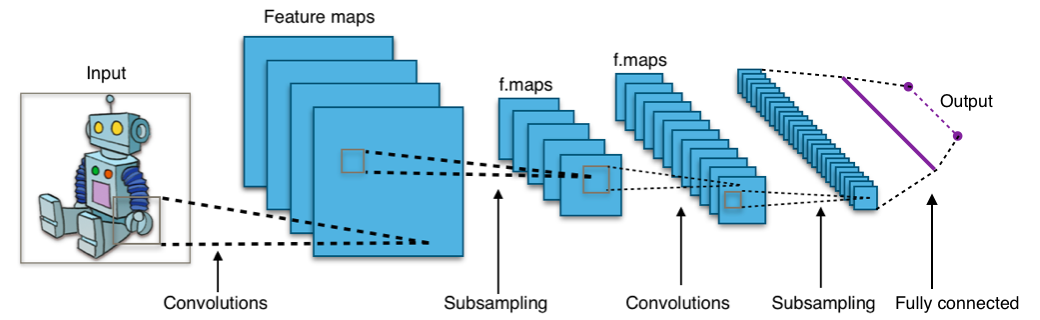\
Figure: Convolutional Neural Network from Wikimedia

In [74]:
#Load and split train and test data
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

classes = np.unique(train_Y) #List unique classes in the training labels
nClasses = len(classes) #Number of unique classes among training lables
class_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker','Bag','Ankle boot']
print('Total number of outputs : ', nClasses)
disp_classes = []
for i in enumerate(classes):
    disp_classes.append(str(i[0])+" "+str(class_label[i[0]]))
print(disp_classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


Text(0.5, 1.0, 'Ground Truth : Ankle boot')

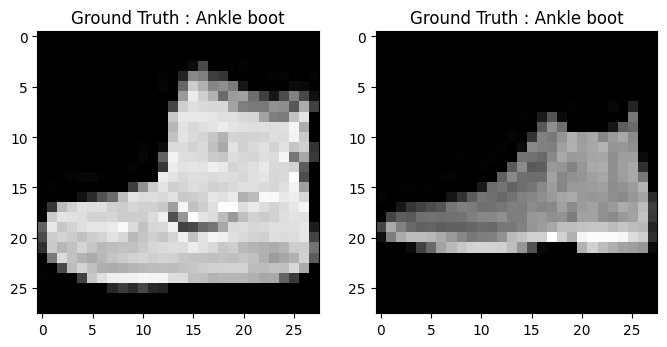

In [75]:
plt.figure(figsize=[8,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(class_label[train_Y[0]]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(class_label[test_Y[0]]))


In [77]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [78]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape


((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

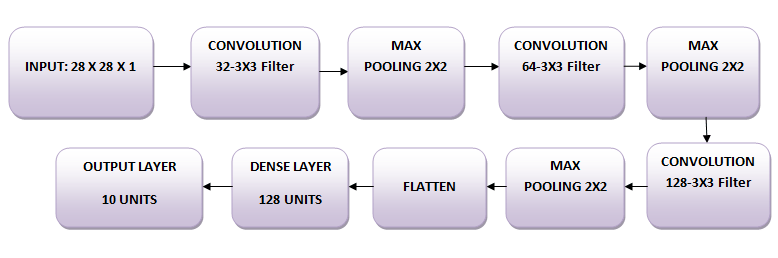

In [79]:
batch_size = 64
epochs = 20
num_classes = 10
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

#compile the model
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [80]:
fashion_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Visualize CNN 
https://github.com/paulgavrikov/visualkeras

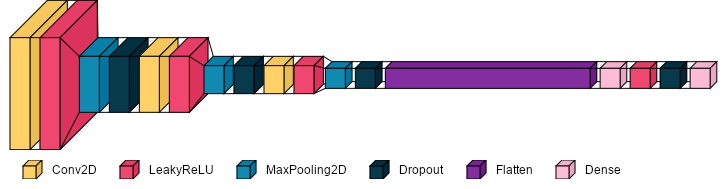

In [129]:
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(fashion_model, legend=True, font=font, draw_volume=True) # selected font

This is a visualization of the model layers using the visualkeras library

**Train the model**

In [24]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.7559 - loss: 0.6611 - val_accuracy: 0.8817 - val_loss: 0.3325
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8944 - loss: 0.2911 - val_accuracy: 0.9013 - val_loss: 0.2711
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9108 - loss: 0.2422 - val_accuracy: 0.9046 - val_loss: 0.2577
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 47ms/step - accuracy: 0.9235 - loss: 0.2063 - val_accuracy: 0.9147 - val_loss: 0.2376
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9355 - loss: 0.1787 - val_accuracy: 0.9221 - val_loss: 0.2182
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.9435 - loss: 0.1530 - val_accuracy: 0.9194 - val_loss: 0.2416
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.9516 - loss: 0.1320 - val_accuracy: 0.9190 - val_loss: 0.2418
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9567 - loss: 0.1129 - 

In [134]:
fashion_model.save("fashion_train.keras")

**Evaluate Model**

In [26]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.5046520233154297
Test accuracy: 0.9132000207901001


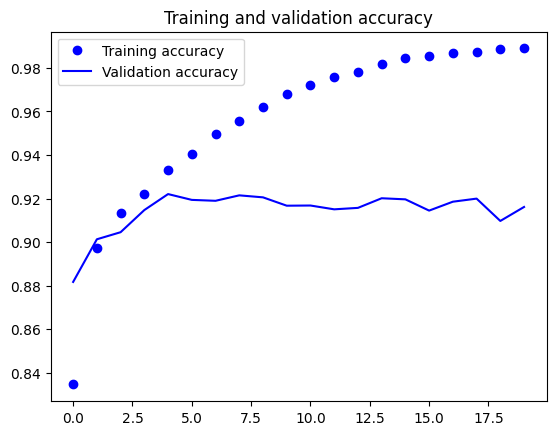

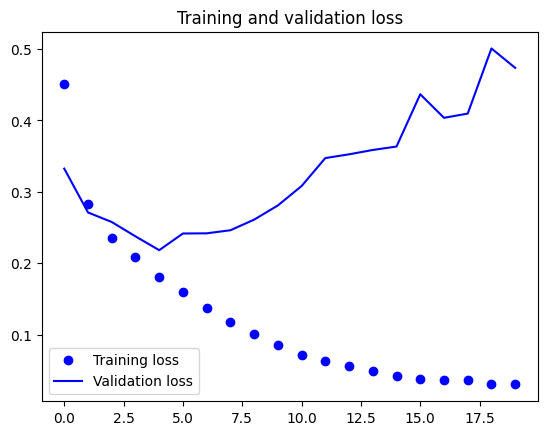

In [29]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


**Comments**\
Training loss decreases while validation loss grows after 3 epochs. This divergence is a clear indicator of model overfitting on the training dataset. This will attempt to be addressed by adding dropout layers after each layer.

**Train Model w/ Dropout**

In [82]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [83]:
fashion_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [85]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.6767 - loss: 0.8654 - val_accuracy: 0.8628 - val_loss: 0.3715
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.8532 - loss: 0.3989 - val_accuracy: 0.8892 - val_loss: 0.3039
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.8779 - loss: 0.3336 - val_accuracy: 0.8883 - val_loss: 0.2988
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.8884 - loss: 0.3027 - val_accuracy: 0.9033 - val_loss: 0.2656
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.8964 - loss: 0.2847 - val_accuracy: 0.9078 - val_loss: 0.2501
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.9014 - loss: 0.2677 - val_accuracy: 0.9131 - val_loss: 0.2381
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9088 - loss: 0.2490 - val_accuracy: 0.9128 - val_loss: 0.2369
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9093 - loss: 0.2471 - 

In [130]:
fashion_model.save("fashion_train_dropout.keras")

**Evaluate Model**

In [90]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9206 - loss: 0.2254
Test loss: 0.21720656752586365
Test accuracy: 0.9214000105857849


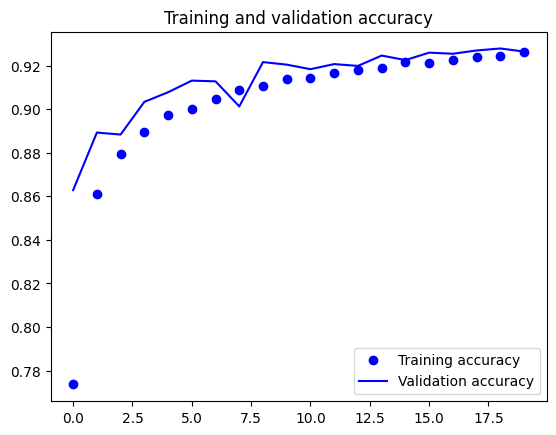

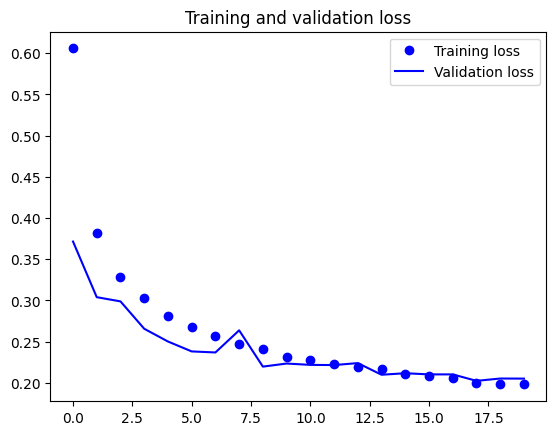

In [92]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


**Comments**
The validiation loss follows closely with the training loss indicating overfitting is not a concern with the dropout model


In [96]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


((10000,), (10000,))

Found 9177 correct labels


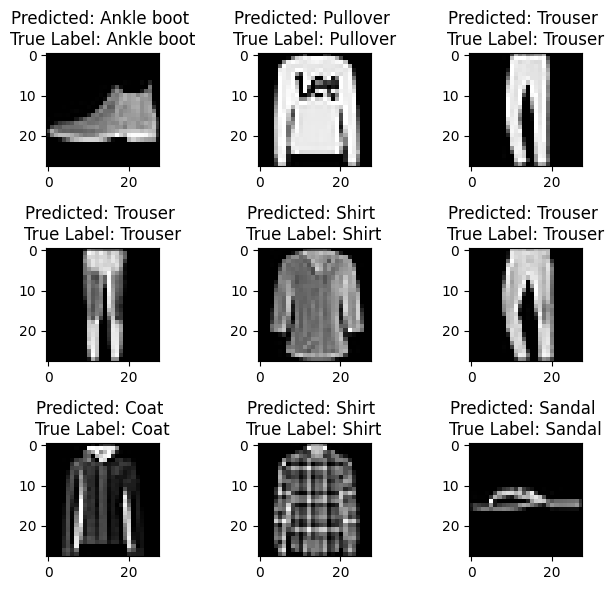

In [123]:
correct = np.where(predicted_classes==test_Y)[0]
plt.figure(figsize=[8,6])
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {} \nTrue Label: {}".format(class_label[predicted_classes[correct]], class_label[test_Y[correct]]))
    plt.tight_layout()


Found 823 incorrect labels


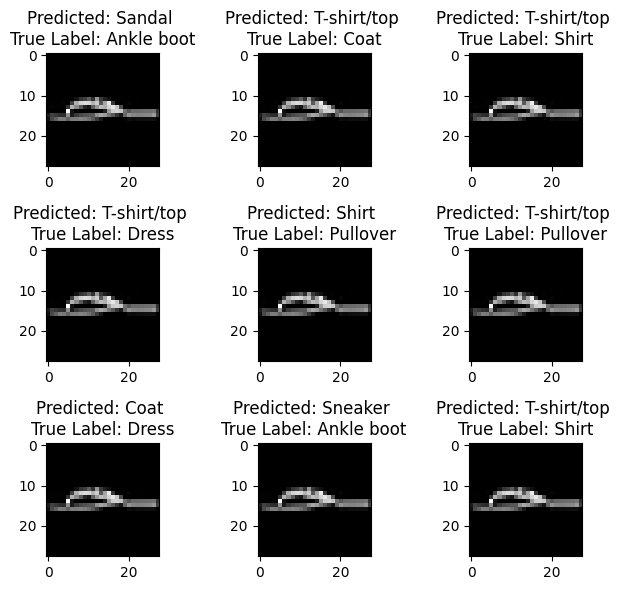

In [126]:
incorrect = np.where(predicted_classes!=test_Y)[0]
plt.figure(figsize=[8,6])
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {} \nTrue Label: {}".format(class_label[predicted_classes[incorrect]], class_label[test_Y[incorrect]]))
    plt.tight_layout()


In [137]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(class_label[i]) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

                   precision    recall  f1-score   support

Class T-shirt/top       0.77      0.93      0.84      1000
    Class Trouser       0.99      0.98      0.99      1000
   Class Pullover       0.87      0.89      0.88      1000
      Class Dress       0.94      0.90      0.92      1000
       Class Coat       0.87      0.87      0.87      1000
     Class Sandal       0.99      0.98      0.99      1000
      Class Shirt       0.84      0.69      0.76      1000
    Class Sneaker       0.95      0.99      0.97      1000
        Class Bag       0.99      0.99      0.99      1000
 Class Ankle boot       0.99      0.96      0.97      1000

         accuracy                           0.92     10000
        macro avg       0.92      0.92      0.92     10000
     weighted avg       0.92      0.92      0.92     10000

